## Analiza danych z grupy telefonawka
<strong>Michał Kwarta 
145192
Grupa I6.1</strong>


Ankieta, z której pochodzą dane została przeprowadzona na grupie na facebooku - [Telefonawka.](https://www.facebook.com/groups/telefonawka)

Większość odpowiedzi pochodzi z lata 2020.
Wszystkie pytania są zawarte w oryginalnym arkuszu xlsx, natomiast ich treść została skrócona.
Na każde pytanie, z wyjątkiem pytania o markę i model można było odpowiedzieć integerem z zakresu 1-10. Ponadto w ankiecie można było zaznaczyć, że posiada się drugi telefon i wypełnić ją raz jeszcze, jednak skupię się na pierwszym telefonie.
Dane pochodzą z obserwacji, na próbie 2325 elementowej.
Nie jest to wiele w kontekście tego ilu ludzi posiada telefon w obecnej chwili, ani w kontekście grupy, która w chwili oddawania zadania domowego ma ponad 30 tysięcy członków.


In [13]:
library(ggplot2)
library(corrplot)
library(gridExtra)
library(repr)
theme<-geom_histogram(binwidth=1, colour="black", fill="white")
title_center<-theme(plot.title = element_text(hjust = 0.5,size=20))
xscale<-scale_x_continuous(breaks = seq(0,10,2))


data<-read.csv('ocena-Odpowiedzi_uproszczone.csv')
data$Srednia<-rowMeans(data[,3:12])
head(data)

,Marka,model,Wydajność,Aparat,Ekran,Oprogramowanie,Bateria.ładowanie,Audio,Wykonanie,Dodatkowe,Komfort,Jakość.cena,Srednia
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Huawei,Huawei p20pro,9,10,6,7,8,7,10,7,10,10,8.4
2,Huawei,P30,8,9,7,8,8,8,10,7,10,9,8.4
3,Xiaomi,Mi 9,9,6,7,7,6,6,10,8,9,10,7.8
4,Xiaomi,Redmi 5 plus,7,3,7,6,8,4,8,8,8,7,6.6
5,Samsung,S9,10,9,10,10,7,7,10,9,10,9,9.1
6,Nokia,Nokia 8,8,6,4,5,6,7,10,5,7,7,6.5


Ankiety w internecie nigdy nie są tak idealne jak byśmy chcieli, dlatego też można zauważyć różne 'dziwne' wartości w kolumnach marka i model. teraz postaram się to pokazać.


In [14]:
unique(data$Marka[grep("\ |xd",data$Marka)])

[1] "Xiaomi Redmi xd"                        
[2] "Poco "                                  
[3] "Realme "                                
[4] "nie mam ale uznajmy ze huawei bo mialem"
[5] "Mateusz Kobus"                          
[6] "Xiaomi Redmi?"

No cóż, 'Mateusz Kobus' nota bene założyciel telefonawki, marką telefonu raczej nie jest.

Nie będziemy filtrować tych danych podczas tej analizy. Byłby one problematyczny gdybyśmy analizowali modele lub marki z osobna, jednak w przypadku gdy analizujemy bez podziału, wszystkie te wyniki mają jakieś znaczenie dla naszej analizy.

Statystyki takie jak wartość minimalna/maksymalna czy rozstęp nie sprawdzą się w tym przypadku, spodziewamy się, że wszędzie rozstęp będzie równy 10. Sprawdźmy więc modę, medianę, średnią i odchylenie. Z racji tego, że średnia(ta nasza) jest zmienną ciągłą, to nie policzymy dla niej Mody ani Mediany.

In [15]:
statystyki <- data.frame(row.names=c('Moda', 'Mediana', 'Średnia', 'Odchylenie'))

Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}
# ^Zapożyczone ze stack overflow
cols<-colnames(data)[3:13]
for (pytanie in cols){
    x <- data[,pytanie]
    statystyki[,pytanie] <- c(
         Mode(x), median(x), round(mean(x), 2), round(sqrt(var(x)), 2))
}
statystyki

,Wydajność,Aparat,Ekran,Oprogramowanie,Bateria.ładowanie,Audio,Wykonanie,Dodatkowe,Komfort,Jakość.cena,Srednia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Moda,10.00,8.00,8.00,10.00,10.00,8.00,10.00,8.00,10.00,10.00,8.40
Mediana,9.00,8.00,8.00,9.00,8.00,8.00,10.00,7.00,9.00,9.00,8.10
Średnia,8.24,7.22,7.92,7.99,7.24,7.66,8.87,6.90,8.44,8.43,7.89
Odchylenie,1.82,2.04,1.85,2.15,2.36,1.88,1.75,2.35,1.96,1.92,1.33


Już na pierwszy rzut oka spodziewamy się, że dane nie będą miały rozkładu normalnego, przecież większość ludzi zanim wyda na coś tyle pieniędzy najpierw robi research(a przynajmniej powinna).\
Jakby tego było mało możemy domyślać się, że grupa zrzesza ludzi zainteresowanych tematem (**zdziwienie**), przez co można założyć, że średnio będą częściej oceniali swoje telefony wyżej niż przeciętny Kowalski.\
Czy taka duża próbka mimo tak dużego rozmiaru jest więc niereprezentatywna? Moim zdaniem, to zależy. Jeśli chcemy zbadać populację ludzi w Polsce czy też na świecie, zdecydowanie tak, natomiast jeśli badamy ludzi zainteresowanych technologią to taka próba jest właśnie tym czego potrzebujemy.

Na pierwszy rzut oka stosunek jakości do ceny wydaje się być najciekawszą kolumną w tabeli, jednak rozkład tej cechy okazuje się już nie być taki ciekawy z perspektywy naszej wiedzy statystycznej

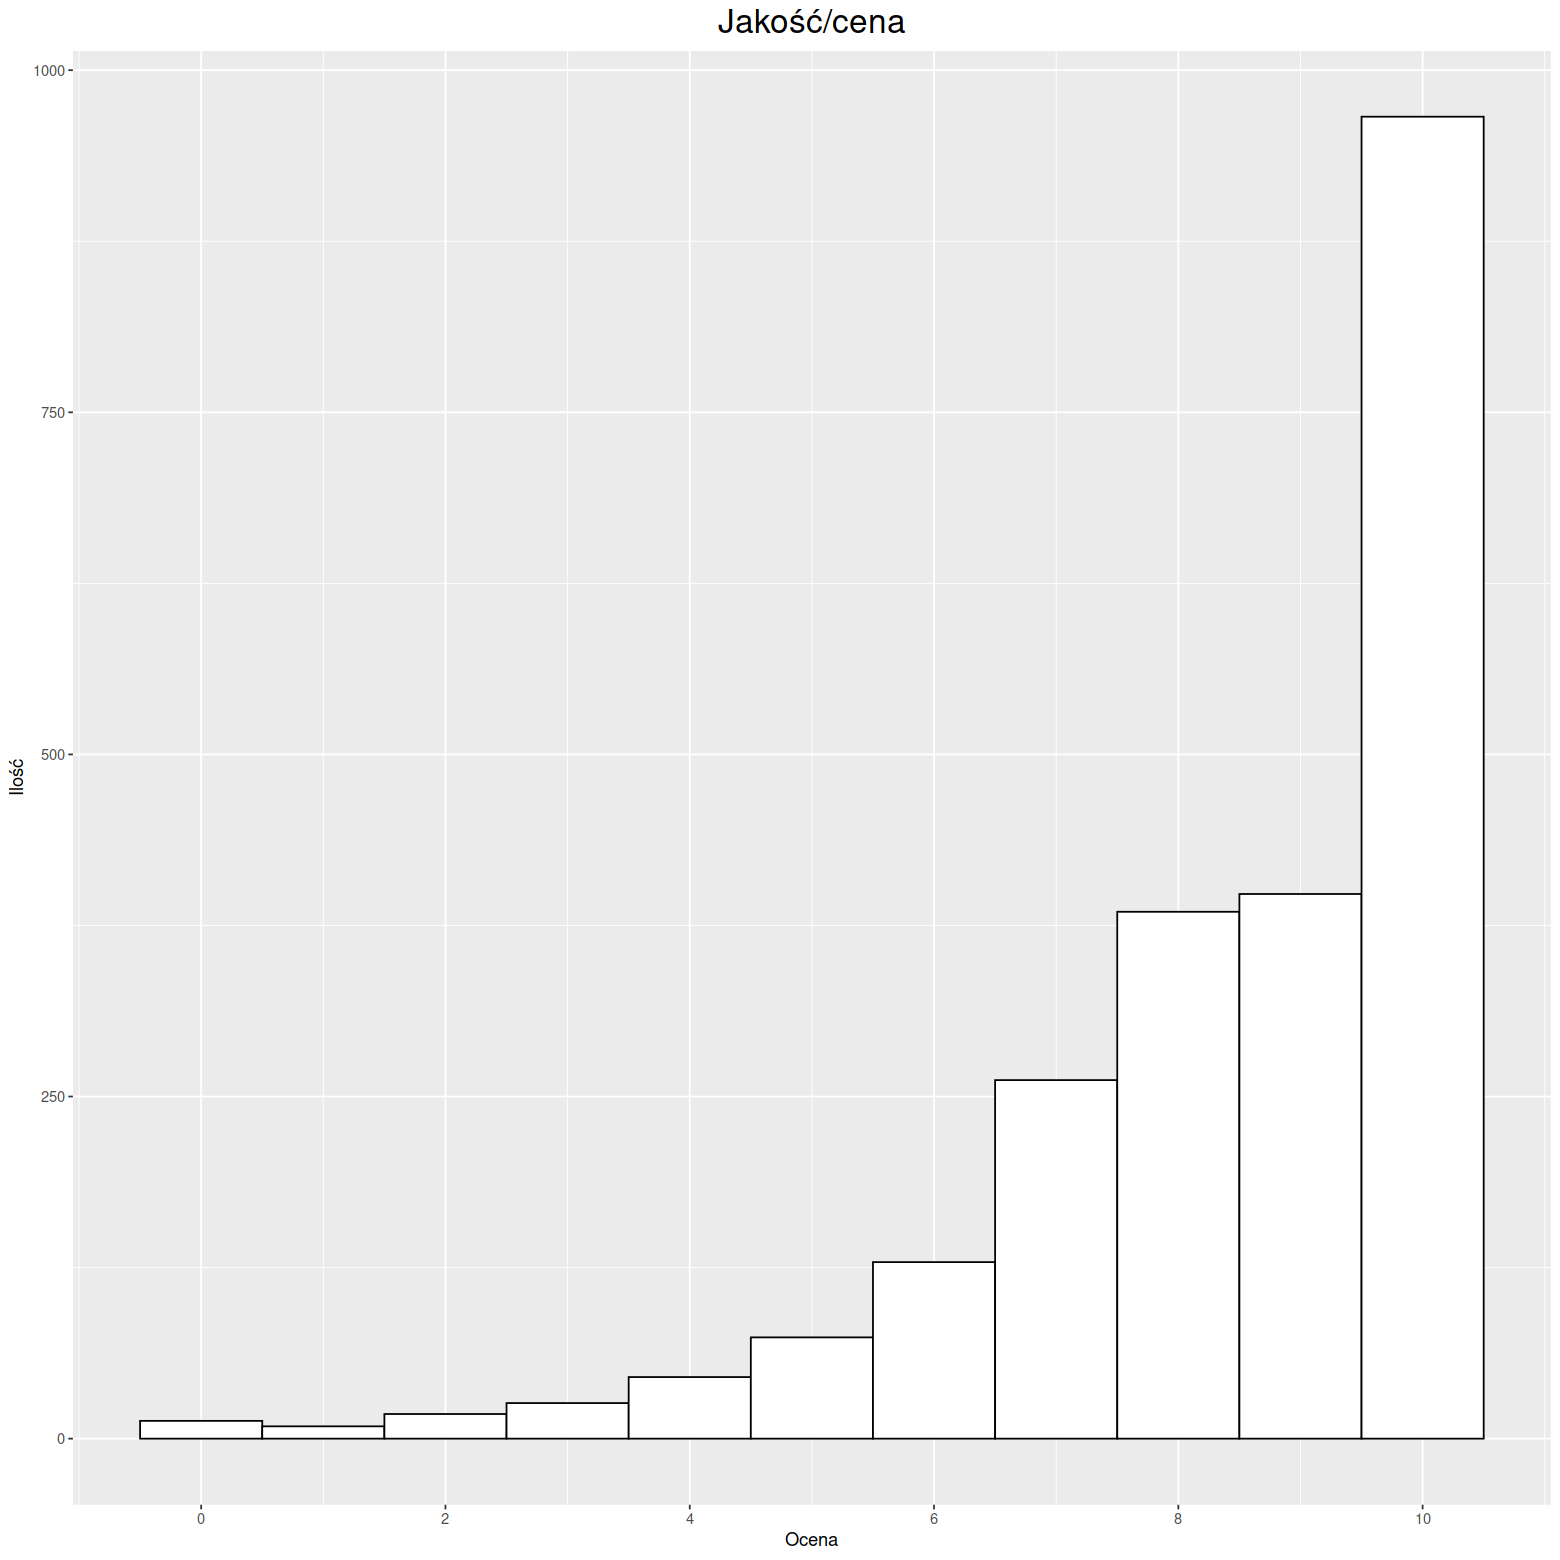

In [16]:
Jakość.cena<-ggplot() + aes(data$Jakość.cena) + labs(title='Jakość/cena',x='Ocena',y='Ilość') + theme+title_center+xscale
Jakość.cena

Sprawdźmy czy inne pytania są tak samo daleko od rozkładu normalnego. Widzimy, że na początku tabeli dosyć duży "rozstrzał" mają aparat, ekran i audio, co potwierdzają zresztą zbadane statystyki. Sprawdźmy więc jak wyglądają wykresy tych cech.


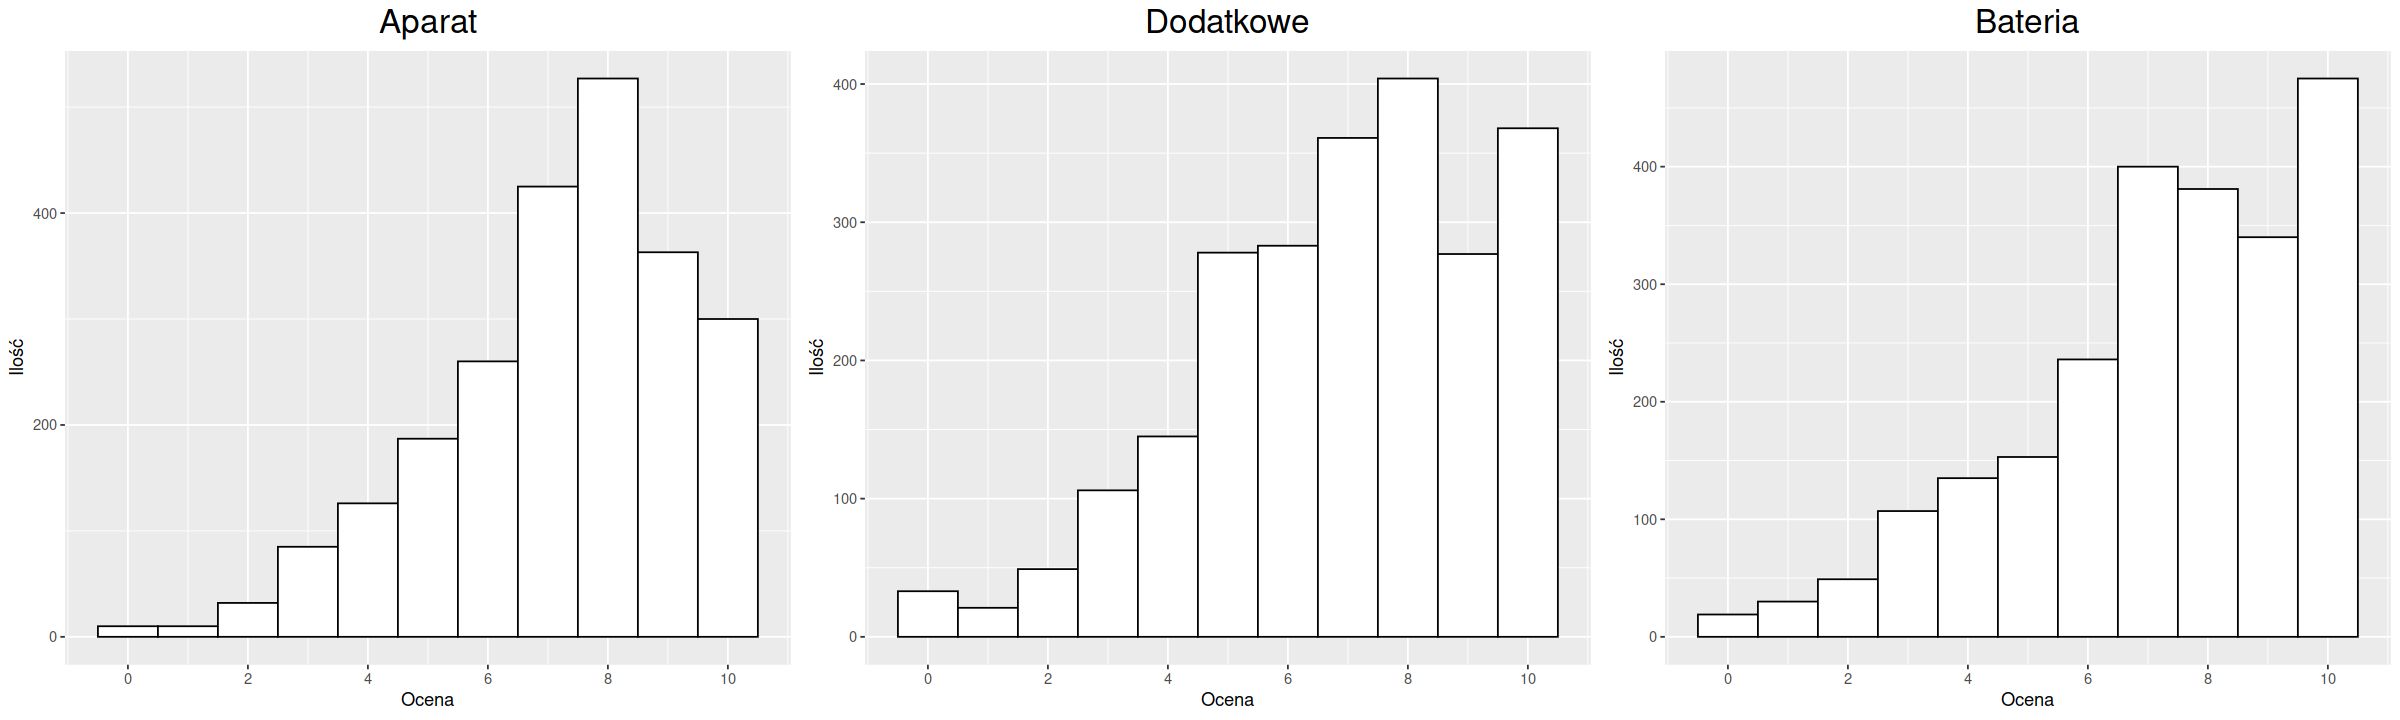

In [24]:
options(repr.plot.width=20, repr.plot.height=6)
Aparat<-ggplot() + aes(data$Aparat) + labs(title='Aparat',x='Ocena',y='Ilość') + theme+title_center+xscale
Dodatkowe<-ggplot() + aes(data$Dodatkowe) + labs(title='Dodatkowe',x='Ocena',y='Ilość') + theme+title_center+xscale
Bateria.ładowanie<-ggplot() + aes(data$Bateria.ładowanie) + labs(title='Bateria',x='Ocena',y='Ilość') + theme+title_center+xscale
grid.arrange(Aparat,Dodatkowe,Bateria.ładowanie,ncol=3)


Zdecydowanie nie jest to nawet blisko rozkładu normalnego, prawdopodobnie warto tez sprawdzić średnią, którą wcześniej dodaliśmy.

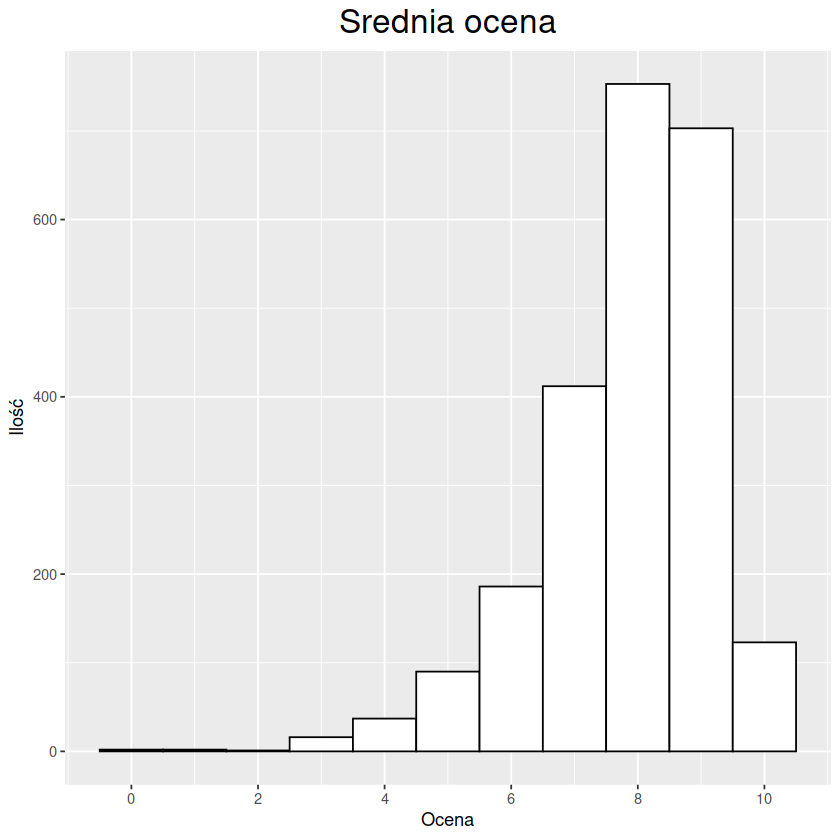

In [18]:
Srednia<-ggplot() + aes(data$Srednia) + labs(title='Srednia ocena',x='Ocena',y='Ilość') + theme+title_center+xscale
options(repr.plot.width=7,repr.plot.height=7)
Srednia

Cóż, mimo uśrednienia wyników ten wykres wcale nas nie zbliżył się do rozkładu normalnego, jednak mimo wszystko to średnia ocena będzie badanym parametrem.

Sprawdźmy jakie parametry są najbardziej skorelowane ze sobą. Oczywiście w takiej ankiecie nie spodziewamy się ujemnej korelacji. Warty uwagi jest fakt, że widocznie mocniej skorelowane są komfort z wydajnością <i>(0,74)</i>.


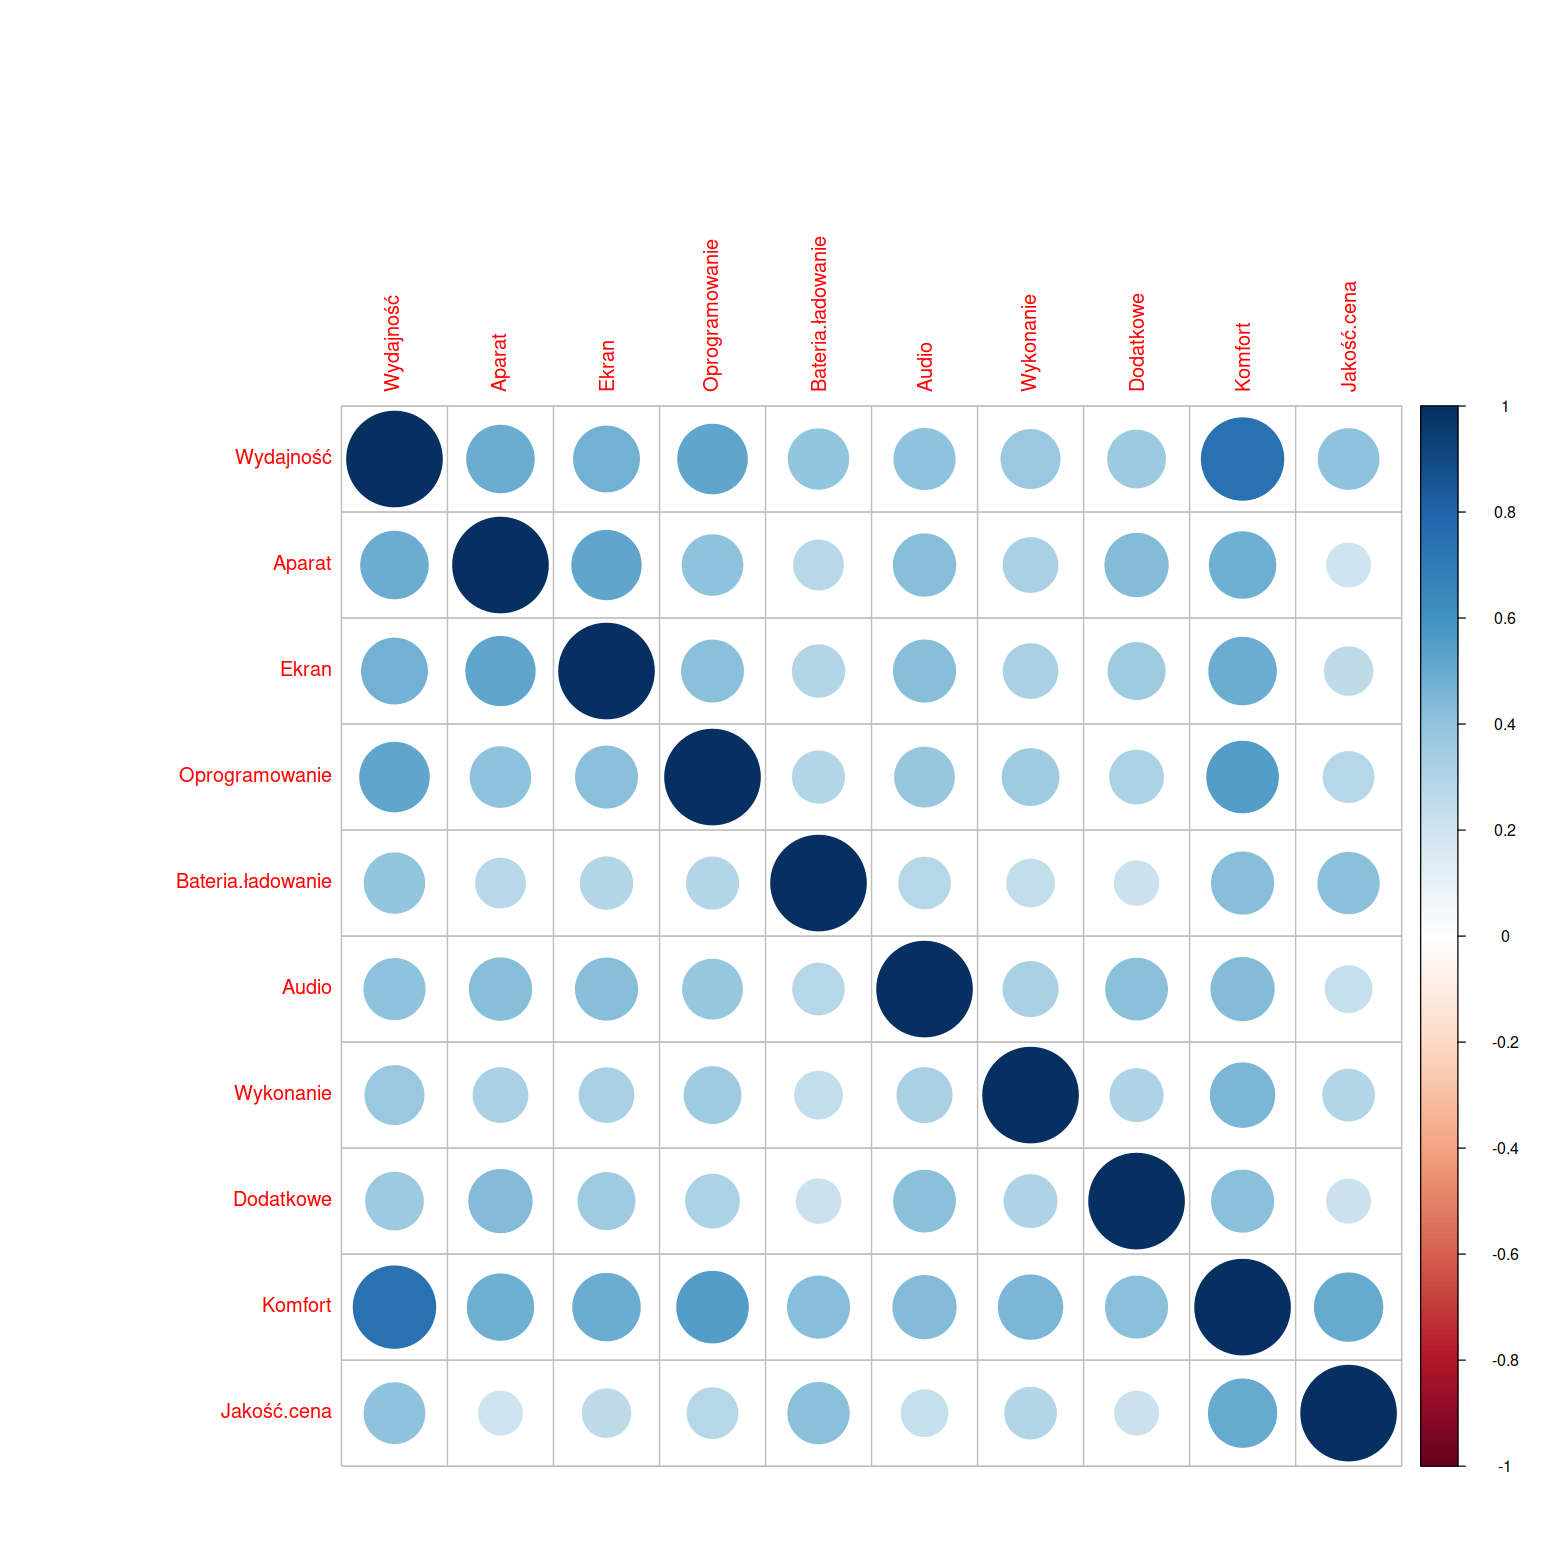

In [19]:
options(repr.plot.width=13,repr.plot.height=13)
corrplot(cor(data[,3:12]), method = 'circle',insig='blank')

Jak pokazano poniżej, przy użyciu metody bootstrap, CLT działa, sprawdźmy jednak czy nasze dane są wystarczające do jego zastosowania.


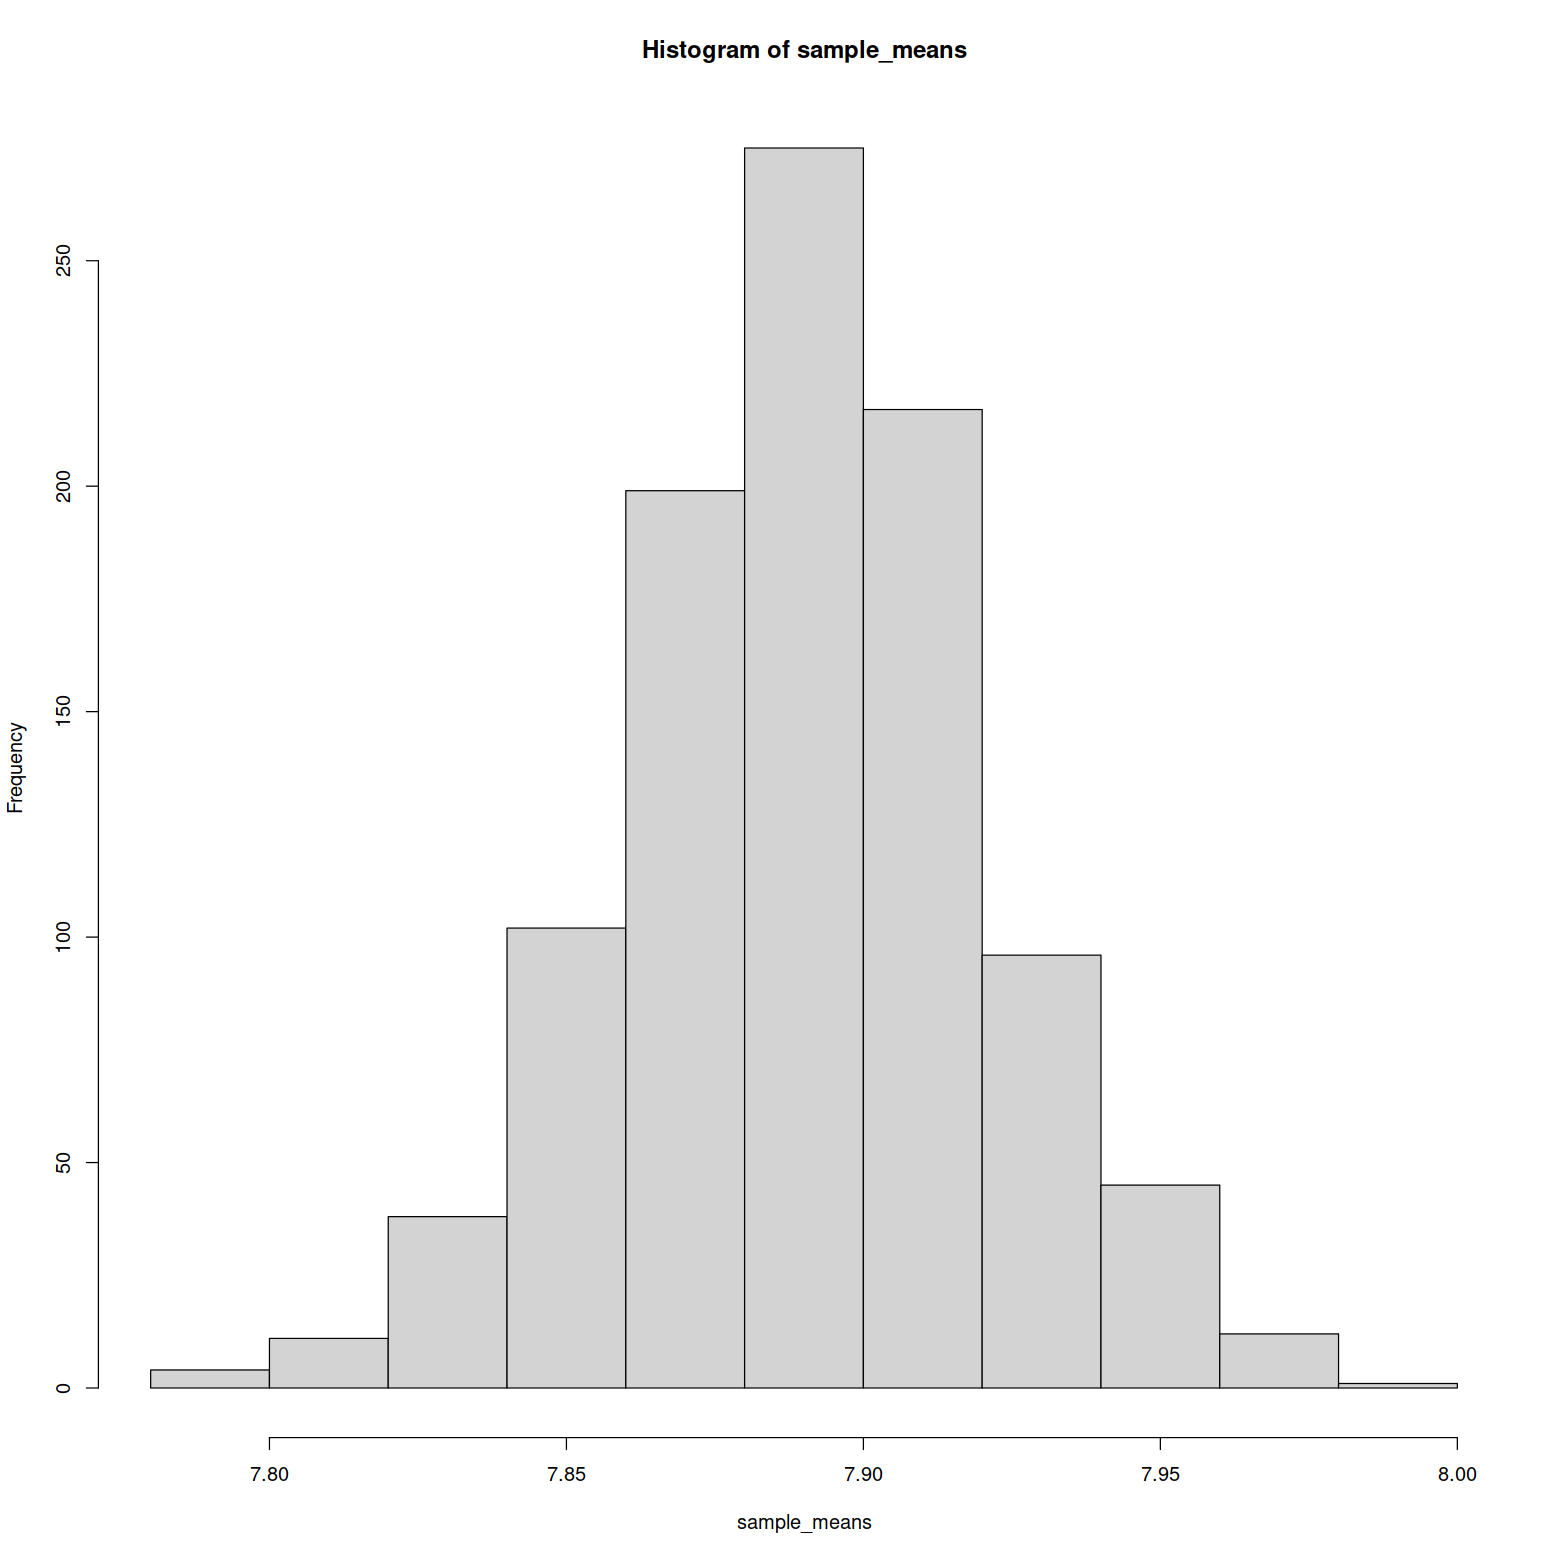

In [20]:
n<-1000
sample_means<-rep(0,n)
for(i in 1:n){sample_means[i]<-mean(sample(data$Srednia,2000,replace=TRUE))}
hist(sample_means)

Podzieliłem dużą próbę na 46 mniejszych o rozmiarze 50, w wyniku czego ucięte zostało 25 rekordów. 

Kolejne próbki wyciągam "jedna po drugiej" dlatego, że czas oddania ankiety nie miał żadnego znaczenia, więc mogę uznać to za "wybór" losowy.

Następnie korzystam z CLT i wyciągam średnie, jednak okazuje się, że rozkład średnich jest daleki od normalnego. Ręczne dostosowanie wielkości próbki w tym wypadku nie dało żadnych efektów wartych uwagi, więc pozostawiam rozmiar = 50 jedynie po to, aby pokazać, że rozkład <strong> nie jest </strong> normalny, w związku z czym przyjmuję założenie o normalności rozkładu dla realizacji ćwiczenia.

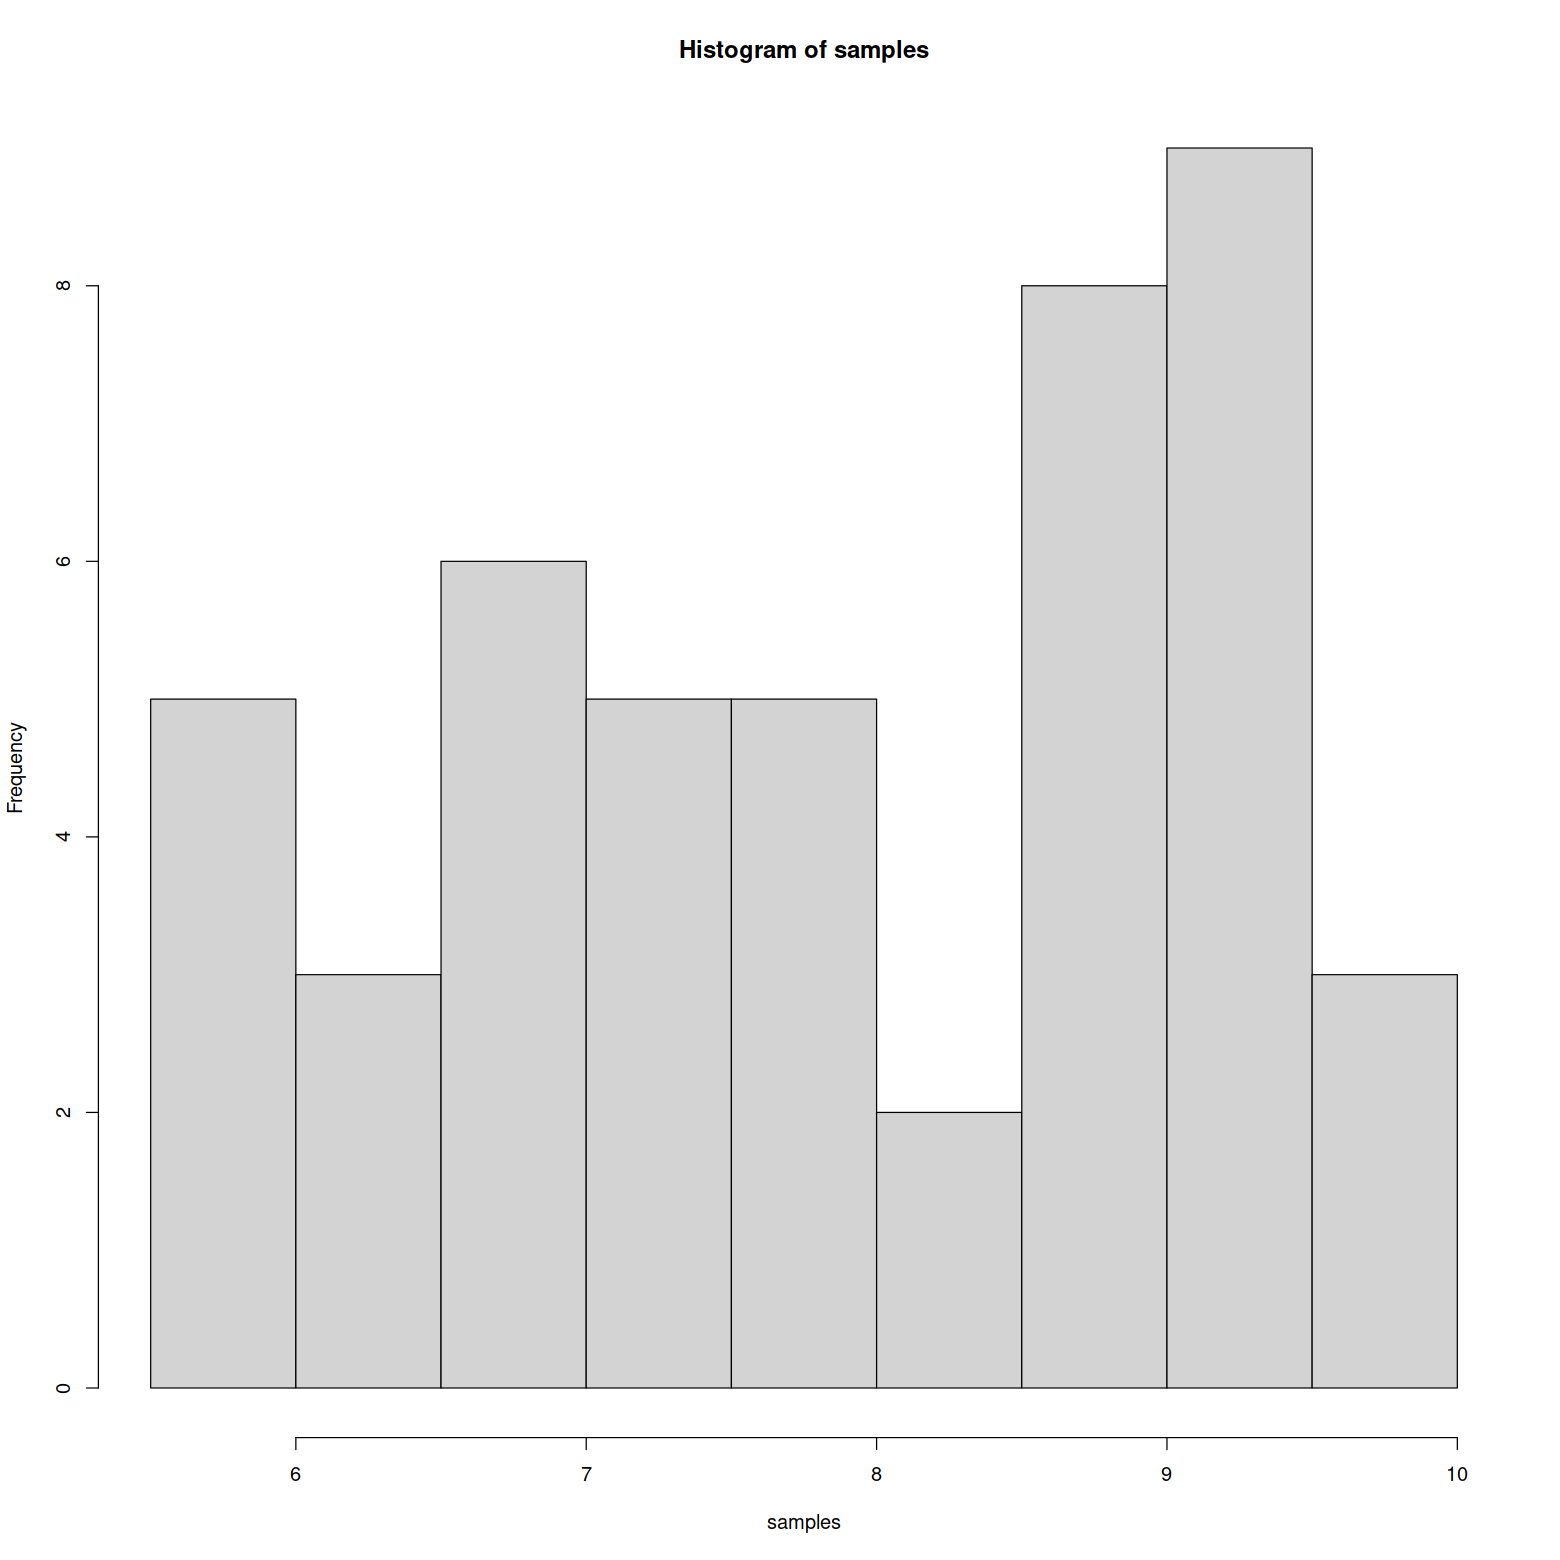

In [21]:
step=50
samples<-{}
indeks=1
for (i in seq(1,2325,by=step))
{
    samples[indeks]<-mean(data[i:i+step-1,'Srednia'])
    indeks<-indeks+1    
}
hist(samples)

## Testowanie Hipotez
<i>Przyjmuję, że dane pochodzą z rozkładu normalnego.</i> 

Czy średnia ocena telefonu jest większa niż 7.9?
Próba jest duża, więc odchylenie estymuję z próby. Z tego samego powodu mogę użyć testu Z.



$H_0: \mu \le 7.9$ 


$H_1: \mu > 7.9$


Poziom istotności $\alpha$ przyjmujemy na 5%
Statystykę i obszar krytyczny naniesiono na wykres rozkładu normalnego ustandaryzowanego.



[1] "przedział krytyczny: (1.64, +inf)"
[1] "statystyka Z:        -0.33"


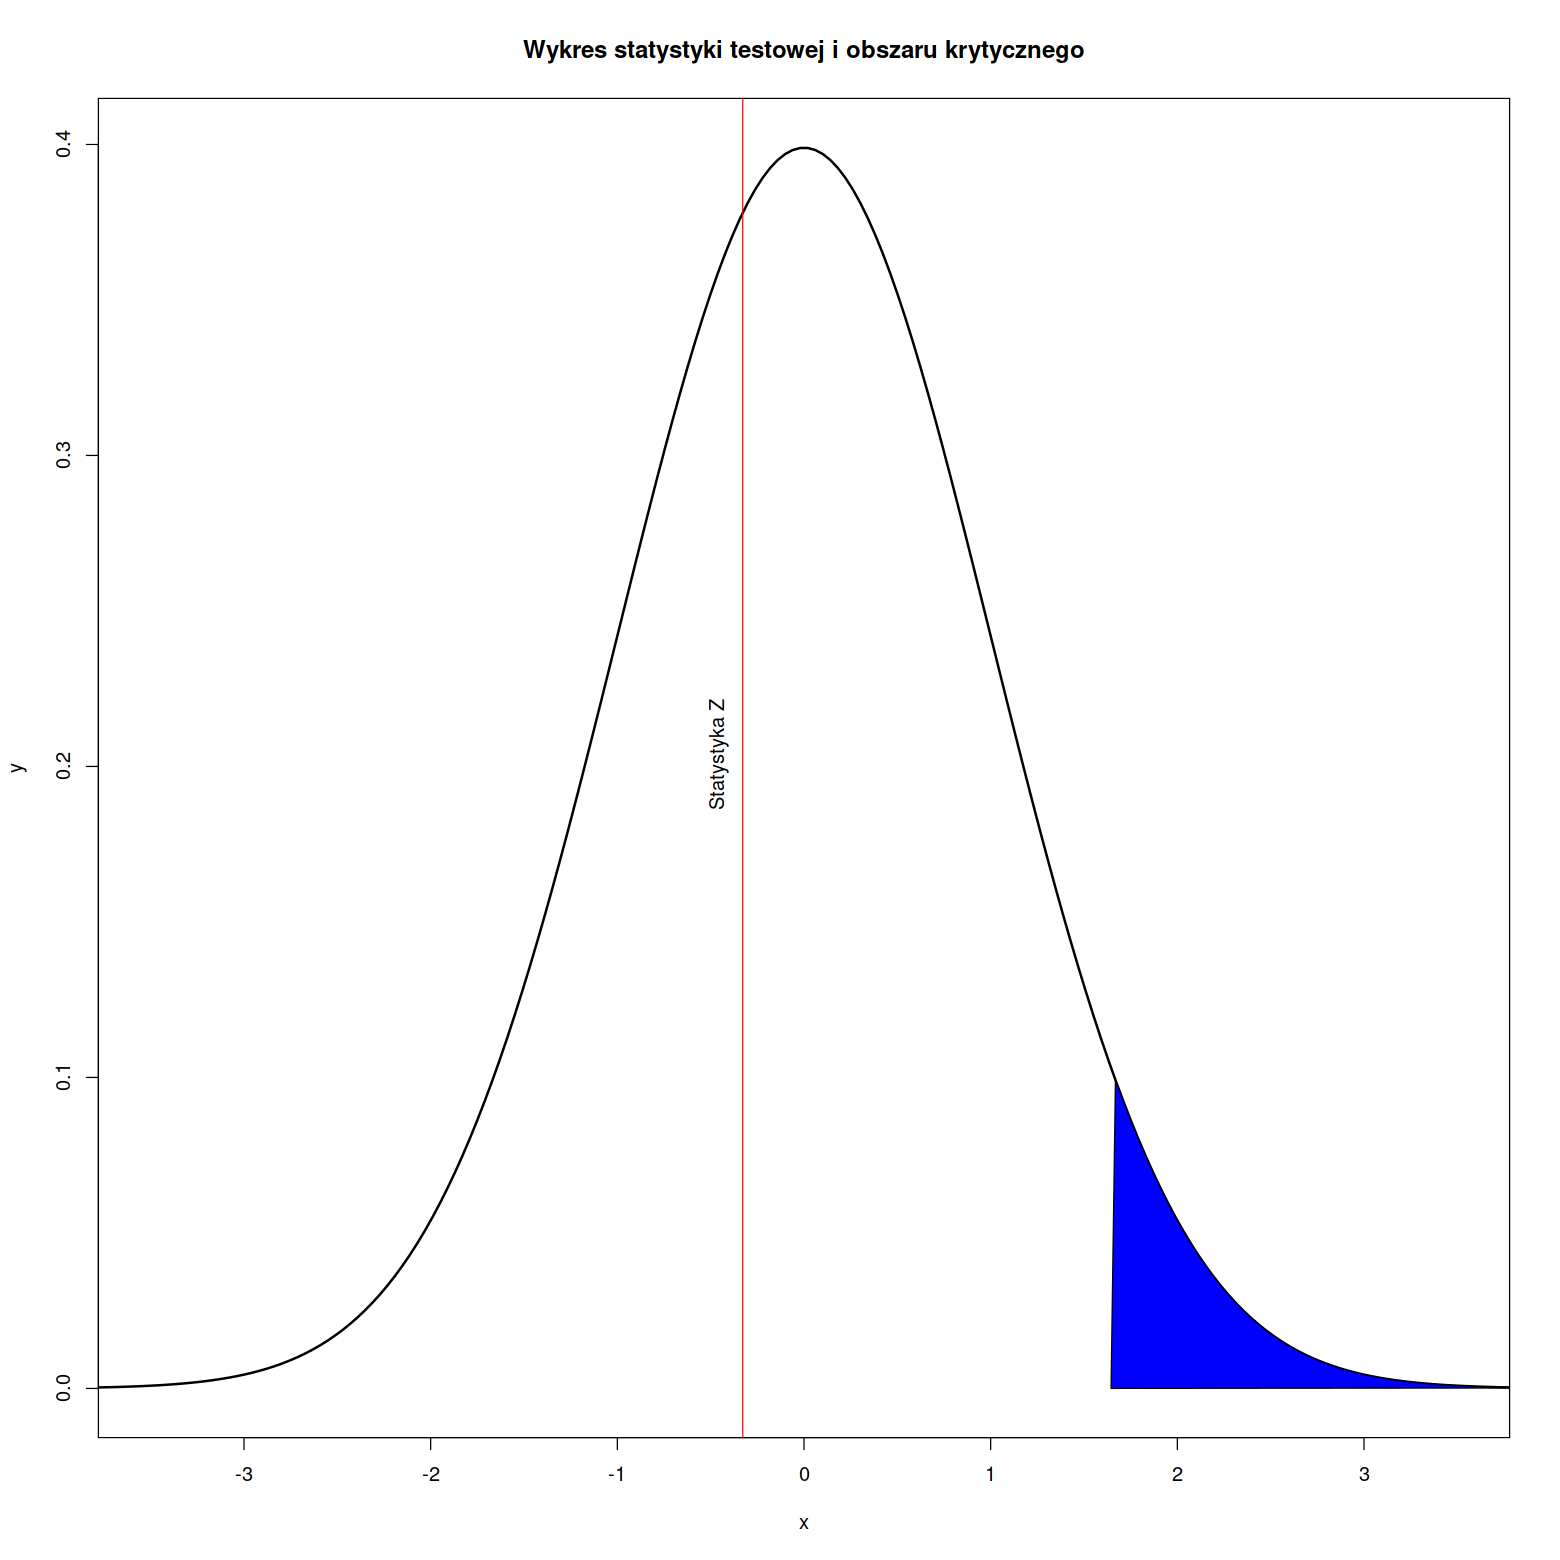

In [22]:
testz <- function(x, mu) (mean(x) - mu) / sqrt(var(x) / length(x))
Z<-testz(data$Srednia,7.9)
przedzial<-qnorm(0.95)
print(sprintf("przedział krytyczny: (%.2f, +inf)", przedzial))
print(sprintf("statystyka Z:        %.2f", Z))
sd<-1
mean<-0


x <- seq(-4, 4, length=200)
y <- dnorm(x, mean=0, sd=1)
plot(x,y, type = "l", lwd = 2, xlim = c(-3.5,3.5),main='Wykres statystyki testowej i obszaru krytycznego')

i <- x >= przedzial & x <= Inf
polygon(c(przedzial,x[i],Inf), c(0,y[i],0), col="blue") 
abline(v=Z,col='red')
text(Z-0.10,0.2,"Statystyka Z",srt=90,pos=3)


Statystyka znajduje się poza obszarem krytycznym, a więc nie ma podstaw do odrzucenia $H_0$